<font size = "5"> **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# Structure Factors
[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Diffraction/CH2_04-Structure_Factors.ipynb)
 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Diffraction/CH2_04-Structure_Factors.ipynb)



part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2021

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install pyTEMlib -q
# pyTEMlib setup ------------------
else:
    if test_package('pyTEMlib') < '0.2021.1.9':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

done


### Load the plotting and figure packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,
* three dimensional plotting
and some libraries from the book
* kinematic scattering library.

In [1]:
import sys
if 'google.colab' in sys.modules:
    %pylab --no-import-all inline
else:
    %pylab --no-import-all notebook
    
# 3D plotting package 
from mpl_toolkits.mplot3d import Axes3D # 3D plotting

# additional package 
import  itertools 
import scipy.constants as const

# Import libraries from the book
import pyTEMlib
import pyTEMlib.KinsCat as ks         # Kinematic sCattering Library
                             # with Atomic form factors from Kirklands book
    
# it is a good idea to show the version numbers at this point for archiving reasons.
__notebook_version__ = '2021.02.03'
print('pyTEM version: ', pyTEMlib.__version__)
print('notebook version: ', __notebook_version__)

Populating the interactive namespace from numpy and matplotlib
Using KinsCat library version  0.5  by G.Duscher
spglib not installed; Symmetry functions of spglib disabled
pyTEM version:  0.2021.01.09
notebook version:  2021.02.03



## Define  Crystal

Here we define silicon but you can use any other structure you like.

In [3]:
#Initialize the dictionary with all the input
tags = ks.structure_by_name('silicon')
print(tags['elements'])
print(tags['base'])

#Reciprocal Lattice 
# We use the linear algebra package of numpy to invert the unit_cell "matrix"
reciprocal_unit_cell = np.linalg.inv(tags['unit_cell']).T # transposed of inverted unit_cell


['Si']
['Si', 'Si', 'Si', 'Si', 'Si', 'Si', 'Si', 'Si']
[(0.0, 0.0, 0.0), (0.5, 0.0, 0.5), (0.5, 0.5, 0.0), (0.0, 0.5, 0.5), [0.25, 0.25, 0.25], [0.75, 0.25, 0.75], [0.75, 0.75, 0.25], [0.25, 0.75, 0.75]]


### Reciprocal Lattice

Check out [Basic Crystallography](CH2_03-Basic_Crystallography.ipynb) notebook for more details on this.

In [4]:
#Reciprocal Lattice 
# We use the linear algebra package of numpy to invert the unit_cell "matrix"
reciprocal_lattice = np.linalg.inv(tags['unit_cell']).T # transposed of inverted unit_cell

print('reciprocal lattice\n',np.round(reciprocal_lattice,3))


reciprocal lattice
 [[1.764 0.    0.   ]
 [0.    1.764 0.   ]
 [0.    0.    1.764]]


### 2D Plot of Unit Cell in Reciprocal Space

<IPython.core.display.Javascript object>


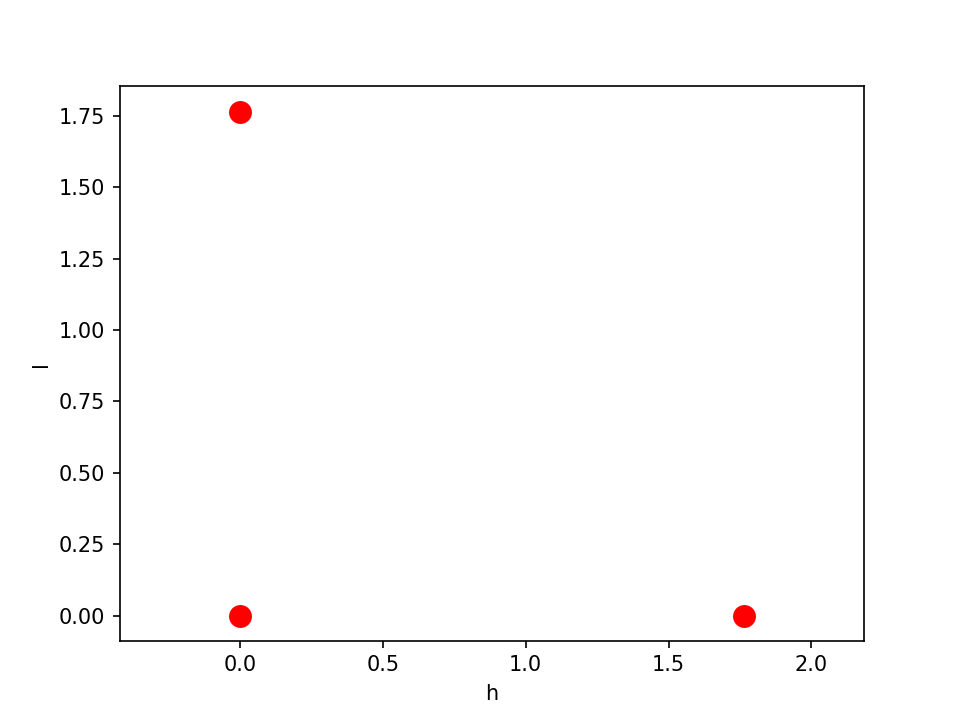

In [6]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(reciprocal_lattice[:,0], reciprocal_lattice[:,2], c='red', s=100)
plt.xlabel('h')
plt.ylabel('l')
ax.axis('equal');

### 3D Plot of Miller Indices

<IPython.core.display.Javascript object>


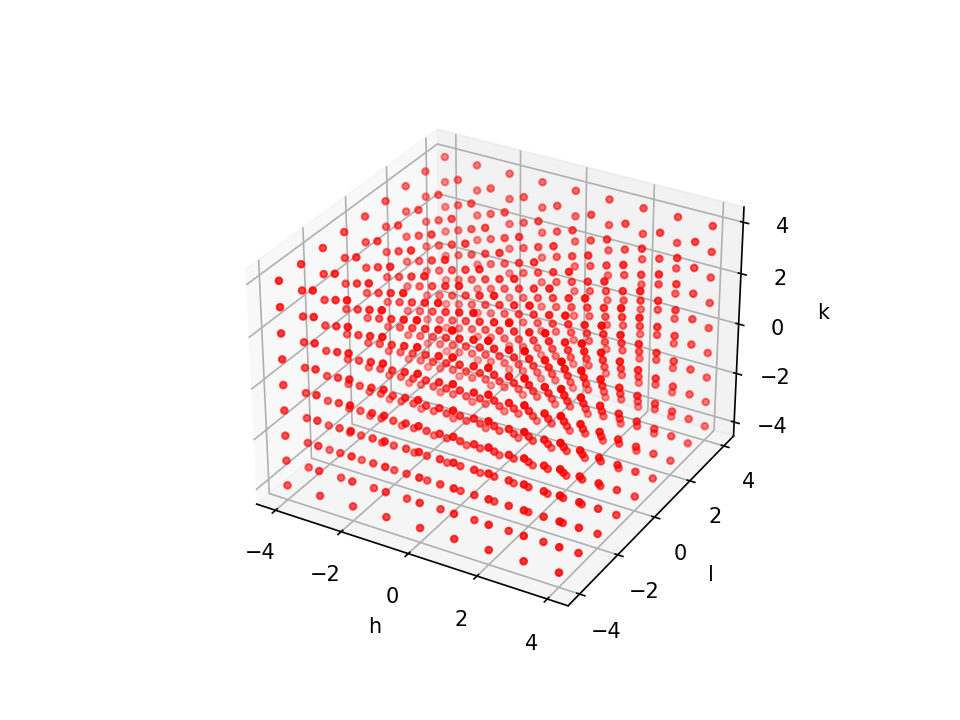

Text(0.5, 0, 'k')

In [7]:
hkl_max = 4
h  = np.linspace(-hkl_max,hkl_max,2*hkl_max+1)  # all evaluated single Miller Indices
hkl  = np.array(list(itertools.product(h,h,h) )) # all evaluated Miller indices

# Plot 2D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hkl[:,0], hkl[:,2], hkl[:,1], c='red', s=10)
plt.xlabel('h')
plt.ylabel('l')
fig.gca().set_zlabel('k')
#ax.set_aspect('equal')

## Reciprocal Space and Miller Indices

For a reciprocal cubic  unit cell with lattice parameter $b = \frac{1}{a}$:

$$	
\vec{g}_{hkl} = \begin{pmatrix}h\\k\\l\end{pmatrix}  \cdot	\begin{pmatrix}b&0&0\\0&b&0\\0&0&b\end{pmatrix} 
$$			

Or more general
			
$$			
\vec{g}_{hkl} = \begin{pmatrix}h\\k\\l\end{pmatrix} \cdot 	\begin{pmatrix}b_{1,1}&b_{1,2}&b_{1,3}\\b_{2,1}&b_{2,2}&b_{2,3}\\b_{3,1}&b_{3,2}&b_{3,3}\end{pmatrix} 
$$


The matrix is of course the reciprocal unit cell or the inverse of the structure matrix.

Therefore, we get any reciprocal lattice vector with the dot product of its Miller indices and the reciprocal lattice matrix.




Spacing of planes with Miller Indices $hkl$
$$			\begin{align*}
			|\vec{g}_{hkl}|& = \frac{1}{d}\\
			d &= \frac{1}{|\vec{g}_{hkl}|}
			\end{align*}$$
			
The length of a vector is called its **norm**.


Be careful there are two different notations for the reciprocal lattice vectors:
- materials science 
- physics

The notations are different in a factor $2\pi$.  The introduction of  $2\pi$ in physics allows to take care of the $n$ more naturally.

In the materials science notation the reciprocal lattice points are directly associated with the Bragg reflections in your diffraction pattern. <br>
(OK,s we are too lacy to keep track of $2\pi$)

### All Possible Reflections

Are then given by the all permutations of the Miller indices and the reiprocal unit cell matrix.

All considered Miller indices are then produced with the itertool package of python.


Evaluation of (6859, 3) reflections of (6859, 3) Miller indices


<IPython.core.display.Javascript object>


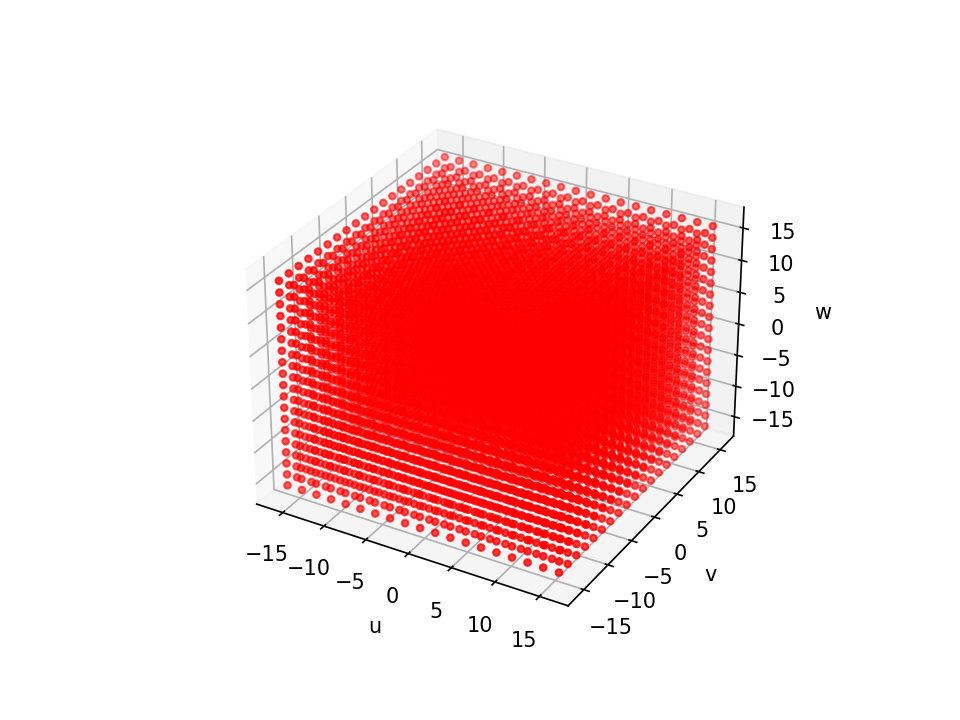

Text(0.5, 0, 'w')

In [10]:

hkl_max = 9#  maximum allowed Miller index

h  = np.linspace(-hkl_max,hkl_max,2*hkl_max+1)   # all evaluated single Miller Indices
hkl  = np.array(list(itertools.product(h,h,h) )) # all evaluated Miller indices
g_hkl = np.dot(hkl,reciprocal_unit_cell)         # all evaluated reciprocal lattice points

print(f'Evaluation of {g_hkl.shape} reflections of {hkl.shape} Miller indices')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(g_hkl[:,0], g_hkl[:,2], g_hkl[:,1], c='red', s=10)
plt.xlabel('u')
plt.ylabel('v')
fig.gca().set_zlabel('w')


### Atomic form factor

If we look at the scattering power of a single atom that deflects an electron:
    
![Single atom scattering](images/scattering_single_atom.jpg)

See [Atomic Form Factor](CH2_02-Atomic_Form_Factor.ipynb) for details

## Calculate Structure Factors 

To extend the single atom view of the atomic form factor $f(\theta$)  to a crystal, we change to the structure factor $F(\theta)$. The structure factor  $F(\theta)$ is a measure
of the amplitude scattered by a unit cell of a crystal
structure. 

Because $F(\theta)$ is an amplitude like  $f(\theta)$, it also
has dimensions of length.We can define  $F(\theta)$ as: 
$$ F_{hkl}(\theta) = \sum_{j=1}^{\inf} f_i(\theta) \mathrm{e}^{[-2 \pi i (h x_j+k y_j + l z_j)]} 
$$

The sum is over all the $i$ atoms in the unit cell (with
atomic coordinates $x_i, y_i, z_i$ 

The structure factors $f_i(\theta)$ are multiplied by a phase factor (the exponential function).
The phase factor takes account of the difference in phase
between waves scattered from atoms on different but
parallel atomic planes with the same Miller indices$ (hkl)$.

The scattering angle $\theta$  is the angle between the angle between the incident
and scattered electron beams.


Please identify all the variables in line 10 below. Please note that we only do a finite number of hkl

In [8]:
# Calculate Structure Factors

structure_factors = []

base = np.dot(tags['base'],tags['unit_cell'])  # transformation from relative to Carthesian coordinates
for j  in range(len(g_hkl)):
    F = 0
    for b in range(len(base)):
        f = ks.feq(tags['elements'][b],np.linalg.norm(np.dot(g_hkl[j], reciprocal_lattice))) # Atomic form factor for element and momentum change (g vector)
        F += f * np.exp(-2*np.pi*1j*(g_hkl[j]*base[b]).sum())        
    structure_factors.append(F)
F = structure_factors = np.array(structure_factors)


### All Allowed Reflections

The structure factor determines whether a reflection is allowed or not.

If the structure factor is zero, the reflection is called forbidden.

In [9]:
# Allowed reflections have a non zero structure factor F (with a  bit of numerical error)
allowed = np.absolute(structure_factors) > 0.001

print(f' Of the evaluated {hkl.shape[0]} Miller indices {allowed.sum()} are allowed. ')

distances = np.linalg.norm(g_hkl, axis = 1)
# We select now all the 
zero = distances == 0.
allowed = np.logical_and(allowed,np.logical_not(zero))

F = F[allowed]
g_hkl = g_hkl[allowed]
hkl = hkl[allowed]
distances = distances[allowed]


 Of the evaluated 6859 Miller indices 1365 are allowed. 


### Families of reflections

reflections with the same length of reciprocal lattice vector are called families

In [10]:
sorted_allowed = np.argsort(distances)

distances = distances[sorted_allowed]
hkl = hkl[sorted_allowed]
F = F[sorted_allowed]

# How many have unique distances and what is their muliplicity

unique, indices  = np.unique(distances, return_index=True)

print(f' Of the {allowed.sum()} allowed Bragg reflections there are {len(unique)} families of reflections.')


 Of the 1364 allowed Bragg reflections there are 47 families of reflections.


### Intensities and Multiplicities


In [11]:
multiplicitity = np.roll(indices,-1)-indices
intensity = np.absolute(F[indices]**2*multiplicitity)
print('\n index \t     hkl \t 1/d [1/nm]     d [pm] \t  F \t multip. intensity' )
family = []
for j in range(len(unique)-1):
    i = indices[j]    
    i2 = indices[j+1]   
    family.append(hkl[i+np.argmax(hkl[i:i2].sum(axis=1))])
    print(f'{i:3g}\t {family[j]} \t  {distances[i]:.2f}  \t {1/distances[i]*1000:.0f} \t {np.absolute(F[i]):.2f}, \t  {indices[j+1]-indices[j]:3g} \t {intensity[j]:.2f}') 
    



 index 	     hkl 	 1/d [1/nm]     d [pm] 	  F 	 multip. intensity
  0	 [1. 1. 1.] 	  3.06  	 327 	 10.05, 	    8 	 808.52
  8	 [0. 2. 2.] 	  4.99  	 200 	 7.10, 	   12 	 605.58
 20	 [3. 1. 1.] 	  5.85  	 171 	 4.02, 	   24 	 387.33
 44	 [0. 0. 4.] 	  7.06  	 142 	 4.39, 	    6 	 115.65
 50	 [3. 1. 3.] 	  7.69  	 130 	 2.75, 	   24 	 182.13
 74	 [2. 2. 4.] 	  8.64  	 116 	 3.30, 	   24 	 260.59
 98	 [1. 5. 1.] 	  9.17  	 109 	 2.14, 	   24 	 109.40
122	 [3. 3. 3.] 	  9.17  	 109 	 2.14, 	    8 	 36.47
130	 [0. 4. 4.] 	  9.98  	 100 	 2.65, 	   12 	 84.35
142	 [3. 5. 1.] 	  10.44  	 96 	 1.75, 	   48 	 146.49
190	 [0. 2. 6.] 	  11.16  	 90 	 2.22, 	   24 	 118.13
214	 [3. 5. 3.] 	  11.57  	 86 	 1.48, 	   24 	 52.43
238	 [4. 4. 4.] 	  12.22  	 82 	 1.91, 	    8 	 29.07
246	 [5. 5. 1.] 	  12.60  	 79 	 1.28, 	   48 	 78.66
294	 [6. 2. 4.] 	  13.20  	 76 	 1.67, 	   48 	 133.86
342	 [5. 5. 3.] 	  13.55  	 74 	 1.13, 	   72 	 91.64
414	 [0. 8. 0.] 	  14.11  	 71 	 1.48, 	    6 	 13.23
420	

## Allowed reflections for Silicon:   
$\ \ |F_{hkl}|^2 =  \begin{cases} (  h , k , l \ \ \mbox{ all odd} &\\
                    (  h ,| k , l \ \  \mbox{all even}& \mbox{and}\ \ h+k+l = 4n\end{cases}$ 

Check above allowed reflections whether this condition is met for the zero order Laue zone.


Please note that the forbidden and alowed reflections are directly a property of the structure factor.

## Diffraction with Parallel Illumination 

Polycrystalline Sample  |Single Crystalline Sample
:---------:|:-----------------:
ring pattern |spot pattern
depends on $F(\theta)$ | depends on $F(\theta)$ 
		| depends on excitation error $s$

## Ring Pattern
<img src="images/CL375.jpg" alt="Bragg's Law" width="300" >
<img src="images/ProfileOfCL375.jpg" alt="Bragg's Law" width="300" >

**Ring Pattern:**
- The profile of a ring diffraction pattern (of a polycrystalline sample) is very close to what a you are used from X-ray diffraction.
- The x-axis is directly the magnitude of the $|\vec{g}| = 1/d$ of a hkl plane set.
	
- The intensity of a Bragg reflection is directly related to the square of the structure factor $I = F^2(\theta)$
	
- The intensity of a ring is directly related to the multiplicity of the family of planes. 


**Ring Pattern Problem:**
-  Where is the center of the ring pattern
- Integration over all angles (spherical coordinates)
- Indexing of pattern is analog to x-ray diffraction. 

The Ring Diffraction Pattern are completely defined by the Structure Factor

<IPython.core.display.Javascript object>


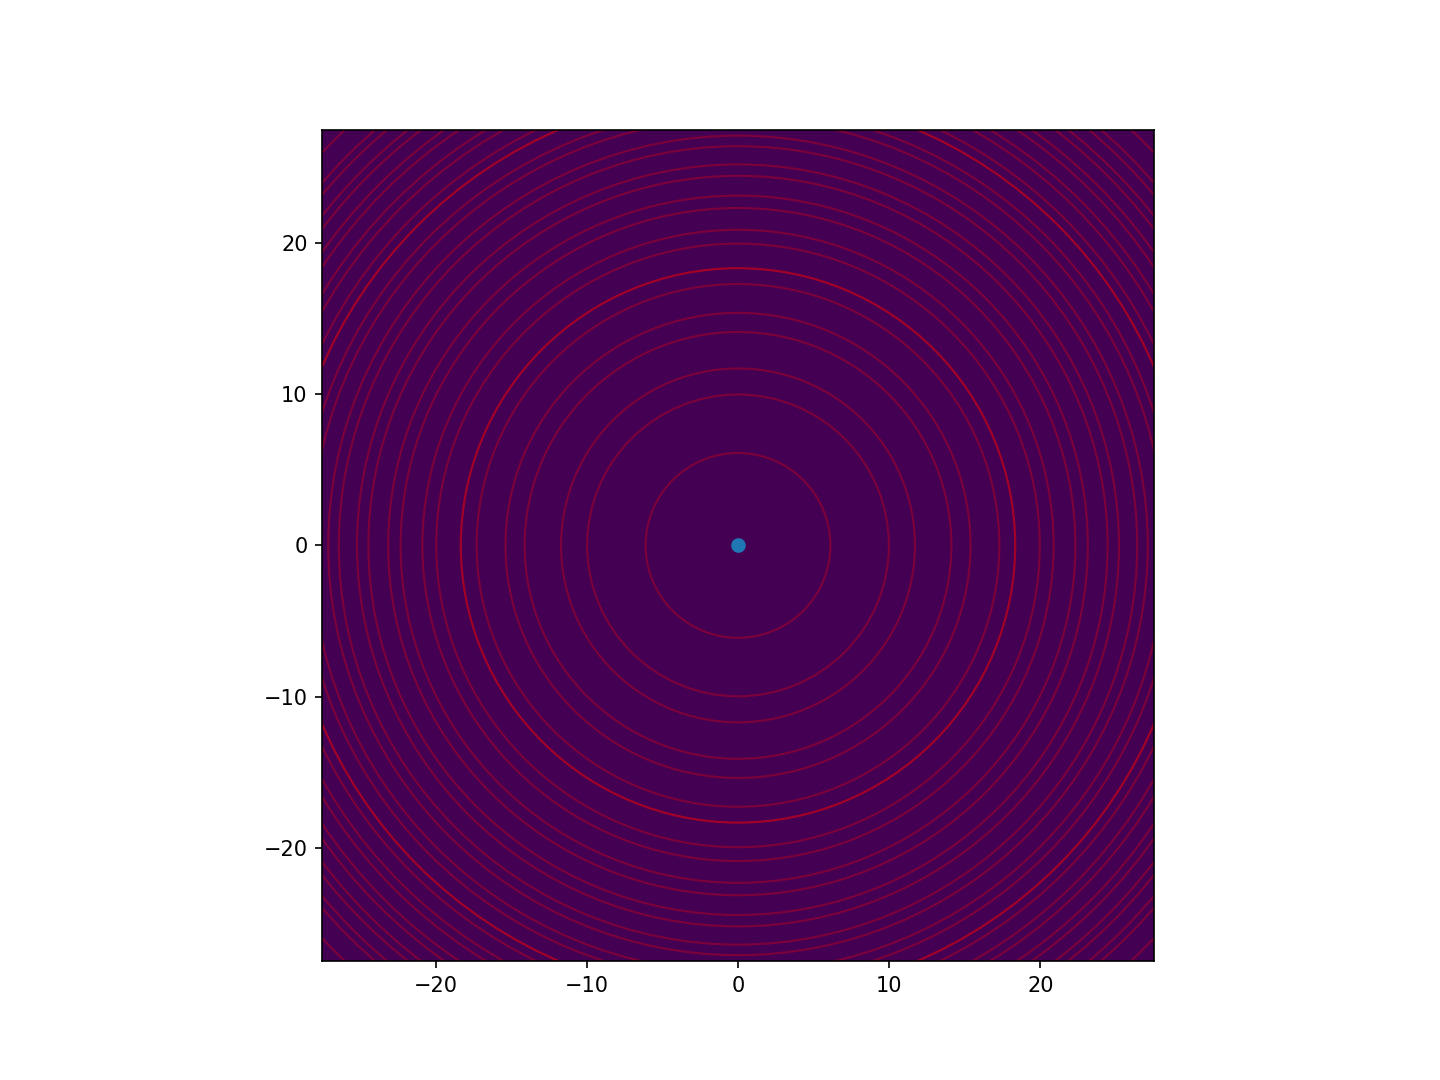

In [12]:
from matplotlib import patches
fig, ax = plt.subplots()
plt.scatter(0,0);
img = np.zeros((1024,1024))
extent = np.array([-1,1,-1,1])*np.max(unique)
plt.imshow(img, extent = extent)

for radius in unique:   
    circle = patches.Circle((0,0), radius*2, color='r', fill= False, alpha = 0.3)#, **kwargs)
    ax.add_artist(circle);


## Conclusion
The scattering geometry provides all the tools to determine which reciprocal lattice points are possible and which of them are allowed.

Next we need to transfer out knowledge into a  diffraction pattern.

## Navigation

- <font size = "3">  **Back Chapter 1: [Basic Crystallography](CH2_03-Basic_Crystallography.ipynb)** </font>
- <font size = "3">  **Next: [Analyzing Ring Diffraction Pattern](CH2_05-Diffraction_Rings.ipynb)** </font>
- <font size = "3">  **Chapter 2: [Diffraction](CH2_00-_Diffraction.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>

